In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.datasets import mnist
from tqdm import tqdm
# from keras.layers.advanced_activations import LeakyReLU
from keras.layers import LeakyReLU
from keras.optimizers import adam

2023-05-24 19:46:58.788603: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = (x_train.astype(np.float32) - 127.5)/127.5
    
    # convert shape of x_train from (60000, 28, 28) to (60000, 784) 
    # 784 columns per row
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)
(X_train, y_train,X_test, y_test)=load_data()
print(X_train.shape)

(60000, 784)


In [ ]:
def adam_optimizer():
    return adam(lr=0.0002, beta_1=0.5)

Mô hình GAN sẽ xây dựng
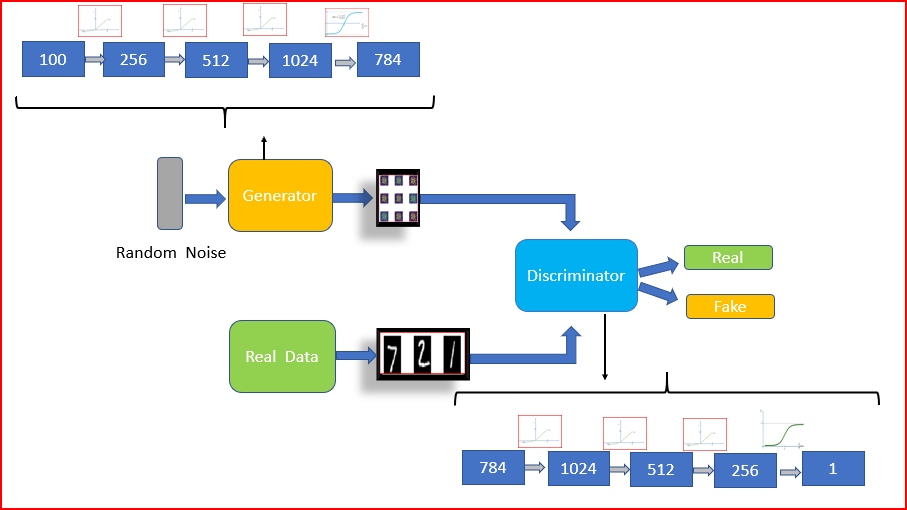

In [ ]:
def create_generator():
    generator=Sequential()
    generator.add(Dense(units=256,input_dim=100))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=512))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=1024))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=784, activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return generator
g=create_generator()
g.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)              

In [ ]:
def create_discriminator():
    discriminator=Sequential()
    discriminator.add(Dense(units=1024,input_dim=784))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    
    discriminator.add(Dense(units=512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    discriminator.add(Dense(units=256))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(units=1, activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return discriminator
d =create_discriminator()
d.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)              

In [ ]:
def create_gan(discriminator, generator):
    discriminator.trainable=False
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output= discriminator(x)
    gan= Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan
gan = create_gan(d,g)
gan.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 784)               1486352   
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 1460225   
Total params: 2,946,577
Trainable params: 1,486,352
Non-trainable params: 1,460,225
_________________________________________________________________


In [ ]:
def plot_generated_images(epoch, generator, examples=100, dim=(10,10), figsize=(10,10)):
    noise= np.random.normal(loc=0, scale=1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(100,28,28)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest',cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image %d.png' %epoch)

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 1


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
  3%|▎         | 4/117 [00:00<00:03, 35.66it/s]

Epoch 2


  3%|▎         | 4/117 [00:00<00:02, 38.13it/s]

Epoch 3


  3%|▎         | 4/117 [00:00<00:03, 32.61it/s]

Epoch 4


  3%|▎         | 4/117 [00:00<00:03, 32.45it/s]

Epoch 5


  3%|▎         | 4/117 [00:00<00:03, 33.38it/s]

Epoch 6


  3%|▎         | 4/117 [00:00<00:02, 38.67it/s]

Epoch 7


  3%|▎         | 4/117 [00:00<00:02, 39.85it/s]

Epoch 8


  3%|▎         | 4/117 [00:00<00:03, 35.36it/s]

Epoch 9


  3%|▎         | 4/117 [00:00<00:03, 36.71it/s]

Epoch 10


  3%|▎         | 4/117 [00:00<00:02, 39.75it/s]

Epoch 11


  3%|▎         | 4/117 [00:00<00:02, 39.04it/s]

Epoch 12


  3%|▎         | 4/117 [00:00<00:02, 38.87it/s]

Epoch 13


  3%|▎         | 4/117 [00:00<00:03, 33.02it/s]

Epoch 14


  3%|▎         | 4/117 [00:00<00:02, 38.86it/s]

Epoch 15


  3%|▎         | 4/117 [00:00<00:03, 37.09it/s]

Epoch 16


  3%|▎         | 4/117 [00:00<00:03, 33.31it/s]

Epoch 17


  3%|▎         | 4/117 [00:00<00:03, 34.80it/s]

Epoch 18


  3%|▎         | 4/117 [00:00<00:02, 37.78it/s]

Epoch 19


  3%|▎         | 4/117 [00:00<00:02, 39.04it/s]

Epoch 20


  3%|▎         | 4/117 [00:00<00:03, 35.50it/s]

Epoch 21


  3%|▎         | 4/117 [00:00<00:02, 38.46it/s]

Epoch 22


  3%|▎         | 4/117 [00:00<00:02, 39.79it/s]

Epoch 23


  3%|▎         | 4/117 [00:00<00:02, 39.48it/s]

Epoch 24


  3%|▎         | 4/117 [00:00<00:03, 33.79it/s]

Epoch 25


  3%|▎         | 4/117 [00:00<00:03, 36.31it/s]

Epoch 26


  3%|▎         | 4/117 [00:00<00:02, 39.57it/s]

Epoch 27


  3%|▎         | 4/117 [00:00<00:03, 34.25it/s]

Epoch 28


  3%|▎         | 4/117 [00:00<00:02, 39.48it/s]

Epoch 29


  3%|▎         | 4/117 [00:00<00:03, 34.02it/s]

Epoch 30


  3%|▎         | 4/117 [00:00<00:03, 35.87it/s]

Epoch 31


  3%|▎         | 4/117 [00:00<00:03, 36.95it/s]

Epoch 32


  3%|▎         | 4/117 [00:00<00:03, 35.84it/s]

Epoch 33


  3%|▎         | 4/117 [00:00<00:02, 37.72it/s]

Epoch 34


  3%|▎         | 4/117 [00:00<00:02, 39.04it/s]

Epoch 35


  3%|▎         | 4/117 [00:00<00:03, 35.28it/s]

Epoch 36


  3%|▎         | 4/117 [00:00<00:03, 32.02it/s]

Epoch 37


  3%|▎         | 4/117 [00:00<00:03, 34.46it/s]

Epoch 38


  3%|▎         | 4/117 [00:00<00:02, 39.78it/s]

Epoch 39


  3%|▎         | 4/117 [00:00<00:03, 35.62it/s]

Epoch 40


  3%|▎         | 4/117 [00:00<00:03, 33.51it/s]

Epoch 41


  3%|▎         | 4/117 [00:00<00:03, 36.23it/s]

Epoch 42


  3%|▎         | 4/117 [00:00<00:03, 31.62it/s]

Epoch 43


  4%|▍         | 5/117 [00:00<00:02, 40.51it/s]

Epoch 44


  3%|▎         | 4/117 [00:00<00:03, 33.10it/s]

Epoch 45


  3%|▎         | 4/117 [00:00<00:03, 35.44it/s]

Epoch 46


  3%|▎         | 4/117 [00:00<00:03, 35.53it/s]

Epoch 47


  3%|▎         | 4/117 [00:00<00:03, 35.63it/s]

Epoch 48


  3%|▎         | 4/117 [00:00<00:02, 39.07it/s]

Epoch 49


  3%|▎         | 4/117 [00:00<00:03, 36.65it/s]

Epoch 50


  3%|▎         | 4/117 [00:00<00:03, 35.57it/s]

Epoch 51


  3%|▎         | 4/117 [00:00<00:03, 37.43it/s]

Epoch 52


  3%|▎         | 4/117 [00:00<00:02, 38.63it/s]

Epoch 53


  3%|▎         | 4/117 [00:00<00:03, 32.51it/s]

Epoch 54


  3%|▎         | 4/117 [00:00<00:03, 35.66it/s]

Epoch 55


  3%|▎         | 4/117 [00:00<00:03, 35.39it/s]

Epoch 56


  3%|▎         | 4/117 [00:00<00:03, 35.83it/s]

Epoch 57


  3%|▎         | 4/117 [00:00<00:03, 37.24it/s]

Epoch 58


  3%|▎         | 4/117 [00:00<00:03, 32.88it/s]

Epoch 59


  3%|▎         | 4/117 [00:00<00:03, 34.06it/s]

Epoch 60


  3%|▎         | 4/117 [00:00<00:03, 36.10it/s]

Epoch 61


  3%|▎         | 4/117 [00:00<00:03, 37.11it/s]

Epoch 62


  3%|▎         | 4/117 [00:00<00:03, 36.87it/s]

Epoch 63


  3%|▎         | 4/117 [00:00<00:03, 34.31it/s]

Epoch 64


  3%|▎         | 4/117 [00:00<00:03, 36.53it/s]

Epoch 65


  3%|▎         | 4/117 [00:00<00:02, 39.58it/s]

Epoch 66


  3%|▎         | 4/117 [00:00<00:02, 38.52it/s]

Epoch 67


  3%|▎         | 4/117 [00:00<00:03, 34.47it/s]

Epoch 68


  3%|▎         | 4/117 [00:00<00:03, 34.31it/s]

Epoch 69


  3%|▎         | 4/117 [00:00<00:03, 34.30it/s]

Epoch 70


  3%|▎         | 4/117 [00:00<00:02, 39.87it/s]

Epoch 71


  3%|▎         | 4/117 [00:00<00:02, 39.26it/s]

Epoch 72


  3%|▎         | 4/117 [00:00<00:03, 36.83it/s]

Epoch 73


  3%|▎         | 4/117 [00:00<00:03, 34.90it/s]

Epoch 74


  3%|▎         | 4/117 [00:00<00:03, 34.42it/s]

Epoch 75


  3%|▎         | 4/117 [00:00<00:02, 39.55it/s]

Epoch 76


  3%|▎         | 4/117 [00:00<00:02, 38.68it/s]

Epoch 77


  3%|▎         | 4/117 [00:00<00:02, 38.36it/s]

Epoch 78


  3%|▎         | 4/117 [00:00<00:03, 35.02it/s]

Epoch 79


  3%|▎         | 4/117 [00:00<00:03, 36.04it/s]

Epoch 80


  3%|▎         | 4/117 [00:00<00:03, 31.56it/s]

Epoch 81


  3%|▎         | 4/117 [00:00<00:03, 34.92it/s]

Epoch 82


  3%|▎         | 4/117 [00:00<00:02, 38.23it/s]

Epoch 83


  3%|▎         | 4/117 [00:00<00:02, 38.34it/s]

Epoch 84


  3%|▎         | 4/117 [00:00<00:02, 38.99it/s]

Epoch 85


  3%|▎         | 4/117 [00:00<00:03, 34.23it/s]

Epoch 86


  3%|▎         | 4/117 [00:00<00:03, 34.19it/s]

Epoch 87


  3%|▎         | 4/117 [00:00<00:03, 32.91it/s]

Epoch 88


  3%|▎         | 4/117 [00:00<00:03, 33.37it/s]

Epoch 89


  3%|▎         | 4/117 [00:00<00:03, 34.34it/s]

Epoch 90


  3%|▎         | 4/117 [00:00<00:03, 34.89it/s]

Epoch 91


  3%|▎         | 4/117 [00:00<00:02, 39.88it/s]

Epoch 92


  3%|▎         | 4/117 [00:00<00:03, 35.96it/s]

Epoch 93


  3%|▎         | 4/117 [00:00<00:02, 38.77it/s]

Epoch 94


  3%|▎         | 4/117 [00:00<00:02, 39.42it/s]

Epoch 95


  3%|▎         | 4/117 [00:00<00:03, 35.99it/s]

Epoch 96


  3%|▎         | 4/117 [00:00<00:03, 34.98it/s]

Epoch 97


  3%|▎         | 4/117 [00:00<00:03, 36.06it/s]

Epoch 98


  3%|▎         | 4/117 [00:00<00:02, 38.83it/s]

Epoch 99


  3%|▎         | 4/117 [00:00<00:03, 37.14it/s]

Epoch 100


  3%|▎         | 4/117 [00:00<00:03, 34.82it/s]

Epoch 101


  3%|▎         | 4/117 [00:00<00:03, 37.32it/s]

Epoch 102


  3%|▎         | 4/117 [00:00<00:03, 34.02it/s]

Epoch 103


  3%|▎         | 4/117 [00:00<00:03, 35.97it/s]

Epoch 104


  3%|▎         | 4/117 [00:00<00:02, 38.37it/s]

Epoch 105


  3%|▎         | 4/117 [00:00<00:02, 38.83it/s]

Epoch 106


  3%|▎         | 4/117 [00:00<00:03, 32.67it/s]

Epoch 107


  3%|▎         | 4/117 [00:00<00:03, 34.49it/s]

Epoch 108


  3%|▎         | 4/117 [00:00<00:03, 36.35it/s]

Epoch 109


  3%|▎         | 4/117 [00:00<00:02, 38.64it/s]

Epoch 110


  3%|▎         | 4/117 [00:00<00:02, 39.80it/s]

Epoch 111


  3%|▎         | 4/117 [00:00<00:02, 38.21it/s]

Epoch 112


  3%|▎         | 4/117 [00:00<00:03, 36.70it/s]

Epoch 113


  3%|▎         | 4/117 [00:00<00:03, 34.44it/s]

Epoch 114


  3%|▎         | 4/117 [00:00<00:03, 34.12it/s]

Epoch 115


  3%|▎         | 4/117 [00:00<00:03, 36.39it/s]

Epoch 116


  3%|▎         | 4/117 [00:00<00:03, 34.92it/s]

Epoch 117


  3%|▎         | 4/117 [00:00<00:03, 35.82it/s]

Epoch 118


  3%|▎         | 4/117 [00:00<00:03, 33.95it/s]

Epoch 119


  3%|▎         | 4/117 [00:00<00:03, 35.74it/s]

Epoch 120


  3%|▎         | 4/117 [00:00<00:03, 36.76it/s]

Epoch 121


  3%|▎         | 4/117 [00:00<00:03, 35.99it/s]

Epoch 122


  3%|▎         | 4/117 [00:00<00:02, 38.13it/s]

Epoch 123


  3%|▎         | 4/117 [00:00<00:03, 34.56it/s]

Epoch 124


  3%|▎         | 4/117 [00:00<00:03, 35.89it/s]

Epoch 125


  3%|▎         | 4/117 [00:00<00:02, 38.81it/s]

Epoch 126


  3%|▎         | 4/117 [00:00<00:03, 33.72it/s]

Epoch 127


  3%|▎         | 4/117 [00:00<00:03, 35.54it/s]

Epoch 128


  3%|▎         | 4/117 [00:00<00:02, 39.64it/s]

Epoch 129


  3%|▎         | 4/117 [00:00<00:03, 35.91it/s]

Epoch 130


  3%|▎         | 4/117 [00:00<00:03, 33.45it/s]

Epoch 131


  3%|▎         | 4/117 [00:00<00:03, 31.68it/s]

Epoch 132


  3%|▎         | 4/117 [00:00<00:02, 39.83it/s]

Epoch 133


  3%|▎         | 4/117 [00:00<00:03, 36.99it/s]

Epoch 134


  3%|▎         | 4/117 [00:00<00:03, 36.22it/s]

Epoch 135


  3%|▎         | 4/117 [00:00<00:03, 34.11it/s]

Epoch 136


  3%|▎         | 4/117 [00:00<00:02, 38.52it/s]

Epoch 137


  3%|▎         | 4/117 [00:00<00:03, 37.30it/s]

Epoch 138


  3%|▎         | 4/117 [00:00<00:03, 35.89it/s]

Epoch 139


  3%|▎         | 4/117 [00:00<00:02, 38.23it/s]

Epoch 140


  3%|▎         | 4/117 [00:00<00:03, 36.15it/s]

Epoch 141


  3%|▎         | 4/117 [00:00<00:03, 37.51it/s]

Epoch 142


  3%|▎         | 4/117 [00:00<00:02, 38.71it/s]

Epoch 143


  3%|▎         | 4/117 [00:00<00:03, 33.51it/s]

Epoch 144


  3%|▎         | 4/117 [00:00<00:03, 36.32it/s]

Epoch 145


  3%|▎         | 4/117 [00:00<00:03, 34.74it/s]

Epoch 146


  3%|▎         | 4/117 [00:00<00:02, 38.76it/s]

Epoch 147


  3%|▎         | 4/117 [00:00<00:02, 39.42it/s]

Epoch 148


  3%|▎         | 4/117 [00:00<00:02, 38.22it/s]

Epoch 149


  3%|▎         | 4/117 [00:00<00:03, 36.11it/s]

Epoch 150


  3%|▎         | 4/117 [00:00<00:02, 37.71it/s]

Epoch 151


  3%|▎         | 4/117 [00:00<00:03, 37.10it/s]

Epoch 152


  3%|▎         | 4/117 [00:00<00:02, 38.74it/s]

Epoch 153


  3%|▎         | 4/117 [00:00<00:02, 39.98it/s]

Epoch 154


  3%|▎         | 4/117 [00:00<00:03, 37.20it/s]

Epoch 155


  3%|▎         | 4/117 [00:00<00:02, 38.30it/s]

Epoch 156


  3%|▎         | 4/117 [00:00<00:03, 34.96it/s]

Epoch 157


  3%|▎         | 4/117 [00:00<00:02, 38.99it/s]

Epoch 158


  4%|▍         | 5/117 [00:00<00:02, 40.42it/s]

Epoch 159


  4%|▍         | 5/117 [00:00<00:02, 40.38it/s]

Epoch 160


  3%|▎         | 4/117 [00:00<00:03, 34.53it/s]

Epoch 161


  3%|▎         | 4/117 [00:00<00:03, 33.08it/s]

Epoch 162


  3%|▎         | 4/117 [00:00<00:02, 38.54it/s]

Epoch 163


  3%|▎         | 4/117 [00:00<00:03, 36.77it/s]

Epoch 164


  3%|▎         | 4/117 [00:00<00:03, 36.86it/s]

Epoch 165


  3%|▎         | 4/117 [00:00<00:02, 38.71it/s]

Epoch 166


  3%|▎         | 4/117 [00:00<00:02, 39.34it/s]

Epoch 167


  3%|▎         | 4/117 [00:00<00:03, 36.60it/s]

Epoch 168


  3%|▎         | 4/117 [00:00<00:02, 39.11it/s]

Epoch 169


  3%|▎         | 4/117 [00:00<00:03, 34.09it/s]

Epoch 170


  3%|▎         | 4/117 [00:00<00:02, 39.15it/s]

Epoch 171


  3%|▎         | 4/117 [00:00<00:03, 32.42it/s]

Epoch 172


  3%|▎         | 4/117 [00:00<00:03, 33.78it/s]

Epoch 173


  3%|▎         | 4/117 [00:00<00:02, 39.65it/s]

Epoch 174


  3%|▎         | 4/117 [00:00<00:03, 31.44it/s]

Epoch 175


  3%|▎         | 4/117 [00:00<00:03, 34.04it/s]

Epoch 176


  3%|▎         | 4/117 [00:00<00:03, 34.87it/s]

Epoch 177


  3%|▎         | 4/117 [00:00<00:03, 35.82it/s]

Epoch 178


  3%|▎         | 4/117 [00:00<00:02, 38.37it/s]

Epoch 179


  3%|▎         | 4/117 [00:00<00:03, 34.04it/s]

Epoch 180


  3%|▎         | 4/117 [00:00<00:03, 33.53it/s]

Epoch 181


  3%|▎         | 4/117 [00:00<00:03, 32.96it/s]

Epoch 182


  3%|▎         | 4/117 [00:00<00:02, 39.40it/s]

Epoch 183


  3%|▎         | 4/117 [00:00<00:02, 39.62it/s]

Epoch 184


  3%|▎         | 4/117 [00:00<00:03, 32.64it/s]

Epoch 185


  3%|▎         | 4/117 [00:00<00:03, 34.90it/s]

Epoch 186


  3%|▎         | 4/117 [00:00<00:02, 39.56it/s]

Epoch 187


  3%|▎         | 4/117 [00:00<00:03, 34.82it/s]

Epoch 188


  3%|▎         | 4/117 [00:00<00:03, 36.34it/s]

Epoch 189


  3%|▎         | 4/117 [00:00<00:02, 37.99it/s]

Epoch 190


  3%|▎         | 4/117 [00:00<00:03, 33.09it/s]

Epoch 191


  3%|▎         | 4/117 [00:00<00:03, 36.14it/s]

Epoch 192


  3%|▎         | 4/117 [00:00<00:03, 37.64it/s]

Epoch 193


  3%|▎         | 4/117 [00:00<00:03, 37.48it/s]

Epoch 194


  3%|▎         | 4/117 [00:00<00:02, 38.37it/s]

Epoch 195


  4%|▍         | 5/117 [00:00<00:02, 40.51it/s]

Epoch 196


  3%|▎         | 4/117 [00:00<00:02, 39.35it/s]

Epoch 197


  4%|▍         | 5/117 [00:00<00:02, 40.51it/s]

Epoch 198


  3%|▎         | 4/117 [00:00<00:02, 38.67it/s]

Epoch 199


  3%|▎         | 4/117 [00:00<00:03, 37.27it/s]

Epoch 200


  3%|▎         | 4/117 [00:00<00:03, 35.10it/s]

Epoch 201


  3%|▎         | 4/117 [00:00<00:03, 36.19it/s]

Epoch 202


  3%|▎         | 4/117 [00:00<00:03, 35.76it/s]

Epoch 203


  3%|▎         | 4/117 [00:00<00:03, 34.00it/s]

Epoch 204


  3%|▎         | 4/117 [00:00<00:02, 39.71it/s]

Epoch 205


  4%|▍         | 5/117 [00:00<00:02, 40.38it/s]

Epoch 206


  3%|▎         | 4/117 [00:00<00:02, 39.50it/s]

Epoch 207


  3%|▎         | 4/117 [00:00<00:03, 35.10it/s]

Epoch 208


  3%|▎         | 4/117 [00:00<00:03, 33.02it/s]

Epoch 209


  3%|▎         | 4/117 [00:00<00:03, 35.15it/s]

Epoch 210


  3%|▎         | 4/117 [00:00<00:03, 37.22it/s]

Epoch 211


  3%|▎         | 4/117 [00:00<00:02, 38.80it/s]

Epoch 212


  4%|▍         | 5/117 [00:00<00:02, 39.19it/s]

Epoch 213


  3%|▎         | 4/117 [00:00<00:03, 35.83it/s]

Epoch 214


  3%|▎         | 4/117 [00:00<00:03, 36.07it/s]

Epoch 215


  3%|▎         | 4/117 [00:00<00:02, 39.09it/s]

Epoch 216


  4%|▍         | 5/117 [00:00<00:02, 39.37it/s]

Epoch 217


  3%|▎         | 4/117 [00:00<00:03, 31.16it/s]

Epoch 218


  3%|▎         | 4/117 [00:00<00:03, 33.76it/s]

Epoch 219


  3%|▎         | 4/117 [00:00<00:02, 38.87it/s]

Epoch 220


  3%|▎         | 4/117 [00:00<00:02, 38.53it/s]

Epoch 221


  3%|▎         | 4/117 [00:00<00:03, 36.99it/s]

Epoch 222


  3%|▎         | 4/117 [00:00<00:03, 37.03it/s]

Epoch 223


  3%|▎         | 4/117 [00:00<00:03, 34.65it/s]

Epoch 224


  3%|▎         | 4/117 [00:00<00:02, 38.75it/s]

Epoch 225


  3%|▎         | 4/117 [00:00<00:03, 36.21it/s]

Epoch 226


  3%|▎         | 4/117 [00:00<00:03, 33.83it/s]

Epoch 227


  3%|▎         | 3/117 [00:00<00:03, 29.34it/s]

Epoch 228


  3%|▎         | 4/117 [00:00<00:03, 35.68it/s]

Epoch 229


  3%|▎         | 4/117 [00:00<00:02, 38.68it/s]

Epoch 230


  3%|▎         | 4/117 [00:00<00:02, 38.62it/s]

Epoch 231


  3%|▎         | 4/117 [00:00<00:03, 37.50it/s]

Epoch 232


  3%|▎         | 4/117 [00:00<00:03, 35.99it/s]

Epoch 233


  3%|▎         | 4/117 [00:00<00:03, 33.31it/s]

Epoch 234


  3%|▎         | 4/117 [00:00<00:03, 37.33it/s]

Epoch 235


  3%|▎         | 4/117 [00:00<00:02, 37.88it/s]

Epoch 236


  3%|▎         | 4/117 [00:00<00:03, 35.28it/s]

Epoch 237


  3%|▎         | 4/117 [00:00<00:02, 38.43it/s]

Epoch 238


  3%|▎         | 4/117 [00:00<00:03, 36.62it/s]

Epoch 239


  3%|▎         | 4/117 [00:00<00:03, 37.23it/s]

Epoch 240


  3%|▎         | 4/117 [00:00<00:03, 32.88it/s]

Epoch 241


  3%|▎         | 4/117 [00:00<00:02, 38.17it/s]

Epoch 242


  3%|▎         | 4/117 [00:00<00:02, 39.44it/s]

Epoch 243


  3%|▎         | 4/117 [00:00<00:03, 36.24it/s]

Epoch 244


  3%|▎         | 4/117 [00:00<00:02, 38.57it/s]

Epoch 245


  3%|▎         | 4/117 [00:00<00:02, 38.96it/s]

Epoch 246


  3%|▎         | 4/117 [00:00<00:03, 34.55it/s]

Epoch 247


  3%|▎         | 4/117 [00:00<00:03, 36.48it/s]

Epoch 248


  3%|▎         | 4/117 [00:00<00:03, 36.81it/s]

Epoch 249


  4%|▍         | 5/117 [00:00<00:02, 40.26it/s]

Epoch 250


  3%|▎         | 4/117 [00:00<00:03, 35.16it/s]

Epoch 251


  3%|▎         | 4/117 [00:00<00:03, 34.84it/s]

Epoch 252


  3%|▎         | 4/117 [00:00<00:03, 35.13it/s]

Epoch 253


  3%|▎         | 4/117 [00:00<00:03, 34.46it/s]

Epoch 254


  4%|▍         | 5/117 [00:00<00:02, 40.37it/s]

Epoch 255


  3%|▎         | 4/117 [00:00<00:03, 35.62it/s]

Epoch 256


  3%|▎         | 4/117 [00:00<00:02, 38.21it/s]

Epoch 257


  3%|▎         | 4/117 [00:00<00:03, 33.85it/s]

Epoch 258


  3%|▎         | 4/117 [00:00<00:03, 34.39it/s]

Epoch 259


  3%|▎         | 4/117 [00:00<00:03, 36.25it/s]

Epoch 260


  3%|▎         | 4/117 [00:00<00:03, 34.66it/s]

Epoch 261


  3%|▎         | 4/117 [00:00<00:03, 37.43it/s]

Epoch 262


  3%|▎         | 4/117 [00:00<00:03, 36.04it/s]

Epoch 263


  3%|▎         | 4/117 [00:00<00:03, 36.76it/s]

Epoch 264


  3%|▎         | 4/117 [00:00<00:03, 36.18it/s]

Epoch 265


  3%|▎         | 4/117 [00:00<00:03, 35.50it/s]

Epoch 266


  3%|▎         | 4/117 [00:00<00:03, 36.26it/s]

Epoch 267


  3%|▎         | 4/117 [00:00<00:02, 40.00it/s]

Epoch 268


  3%|▎         | 4/117 [00:00<00:03, 36.29it/s]

Epoch 269


  3%|▎         | 4/117 [00:00<00:03, 37.34it/s]

Epoch 270


  3%|▎         | 4/117 [00:00<00:03, 30.66it/s]

Epoch 271


  3%|▎         | 4/117 [00:00<00:03, 37.09it/s]

Epoch 272


  3%|▎         | 4/117 [00:00<00:02, 38.00it/s]

Epoch 273


  3%|▎         | 4/117 [00:00<00:03, 36.15it/s]

Epoch 274


  3%|▎         | 4/117 [00:00<00:03, 34.28it/s]

Epoch 275


  3%|▎         | 4/117 [00:00<00:03, 33.70it/s]

Epoch 276


  4%|▍         | 5/117 [00:00<00:02, 40.57it/s]

Epoch 277


  4%|▍         | 5/117 [00:00<00:02, 40.59it/s]

Epoch 278


  3%|▎         | 4/117 [00:00<00:03, 36.42it/s]

Epoch 279


  3%|▎         | 4/117 [00:00<00:02, 38.95it/s]

Epoch 280


  3%|▎         | 4/117 [00:00<00:03, 36.92it/s]

Epoch 281


  3%|▎         | 4/117 [00:00<00:03, 36.54it/s]

Epoch 282


  3%|▎         | 4/117 [00:00<00:03, 34.83it/s]

Epoch 283


  3%|▎         | 4/117 [00:00<00:03, 36.64it/s]

Epoch 284


  3%|▎         | 4/117 [00:00<00:03, 36.29it/s]

Epoch 285


  3%|▎         | 4/117 [00:00<00:02, 38.69it/s]

Epoch 286


  3%|▎         | 4/117 [00:00<00:03, 36.16it/s]

Epoch 287


  3%|▎         | 4/117 [00:00<00:03, 35.78it/s]

Epoch 288


  3%|▎         | 4/117 [00:00<00:03, 37.40it/s]

Epoch 289


  3%|▎         | 4/117 [00:00<00:03, 37.54it/s]

Epoch 290


  3%|▎         | 4/117 [00:00<00:03, 34.77it/s]

Epoch 291


  3%|▎         | 4/117 [00:00<00:02, 38.32it/s]

Epoch 292


  3%|▎         | 4/117 [00:00<00:02, 39.78it/s]

Epoch 293


  3%|▎         | 4/117 [00:00<00:02, 38.96it/s]

Epoch 294


  3%|▎         | 4/117 [00:00<00:03, 36.56it/s]

Epoch 295


  3%|▎         | 4/117 [00:00<00:03, 34.54it/s]

Epoch 296


  3%|▎         | 4/117 [00:00<00:03, 36.81it/s]

Epoch 297


  3%|▎         | 4/117 [00:00<00:02, 38.26it/s]

Epoch 298


  3%|▎         | 4/117 [00:00<00:02, 38.95it/s]

Epoch 299


  3%|▎         | 4/117 [00:00<00:03, 33.86it/s]

Epoch 300


100%|██████████| 117/117 [00:03<00:00, 35.74it/s]


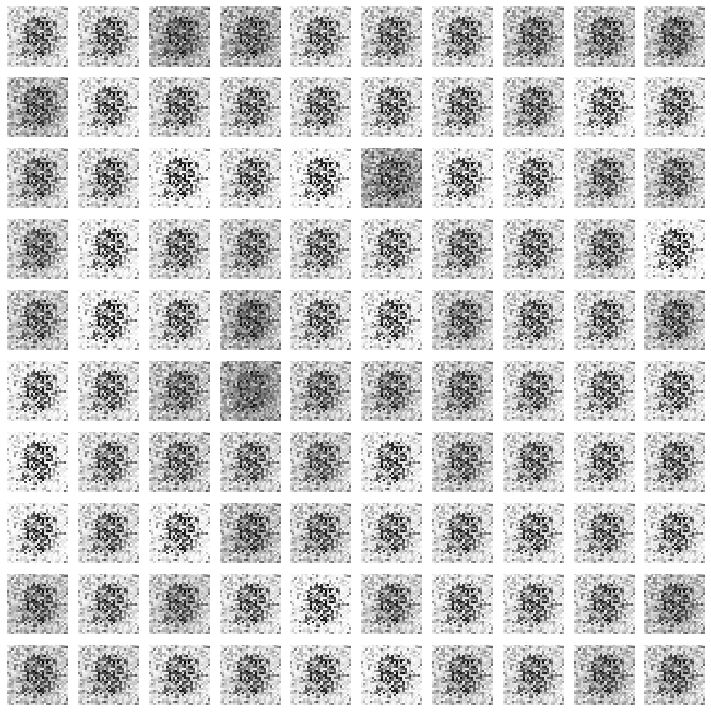

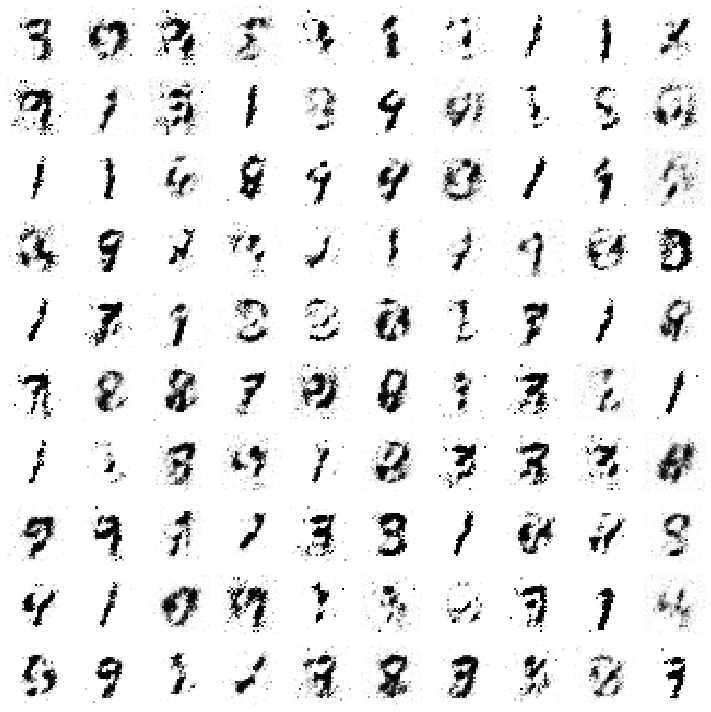

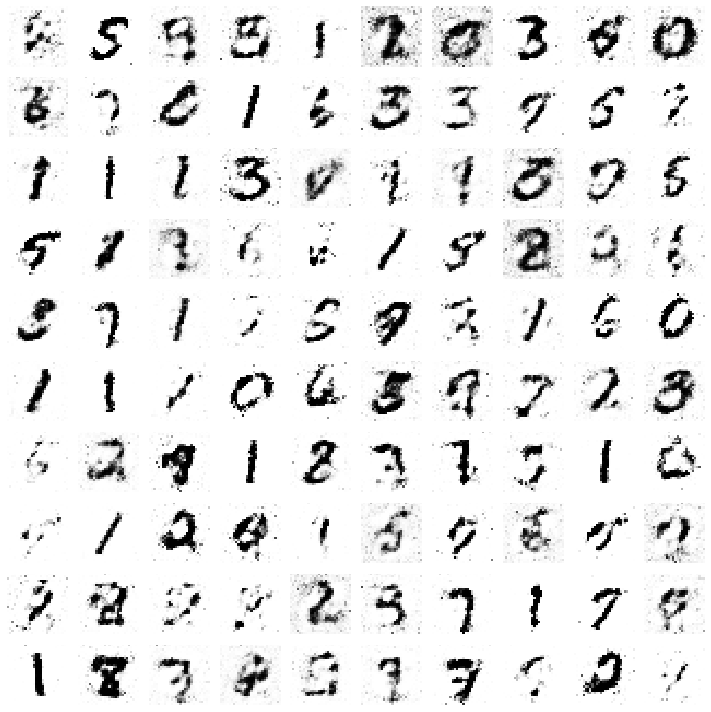

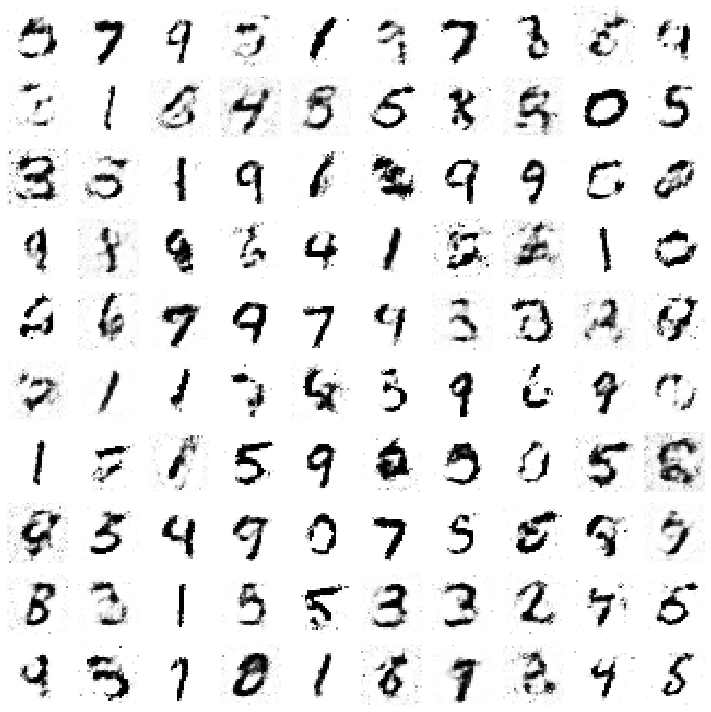

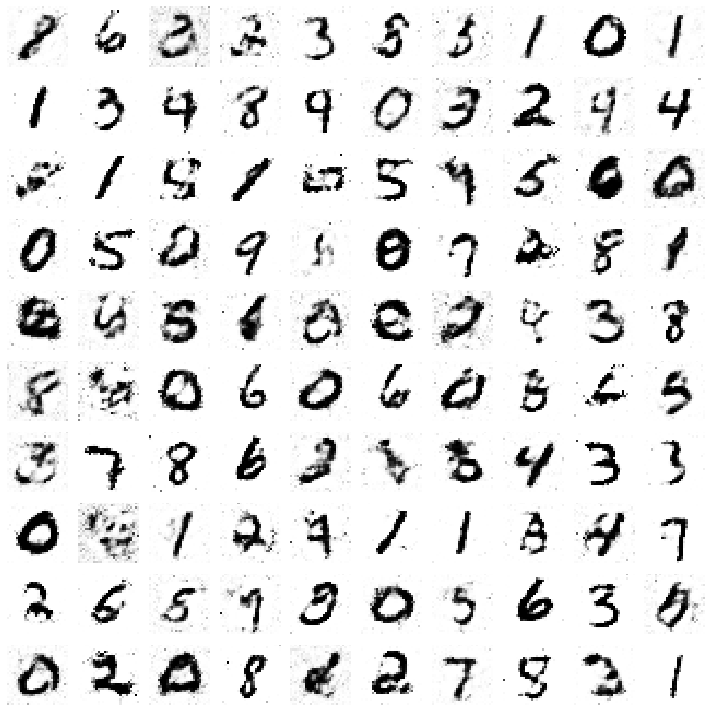

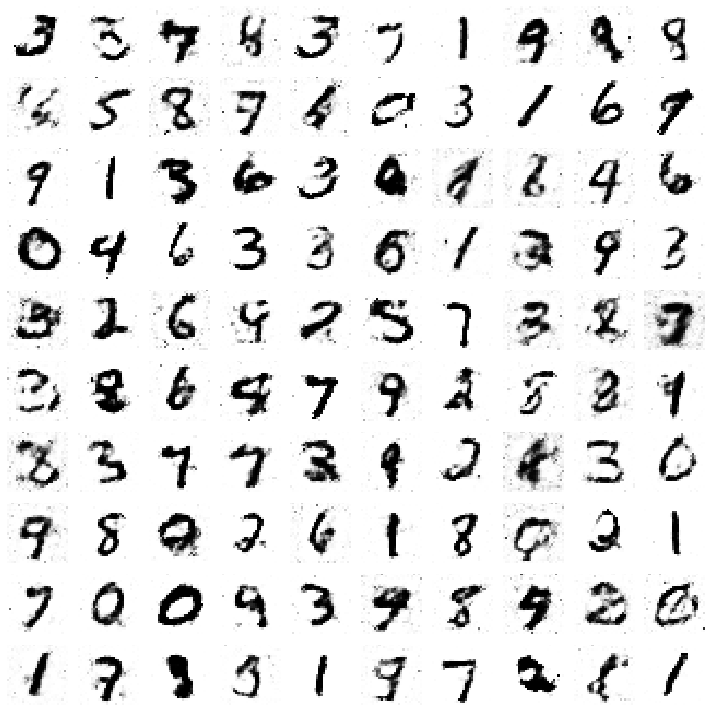

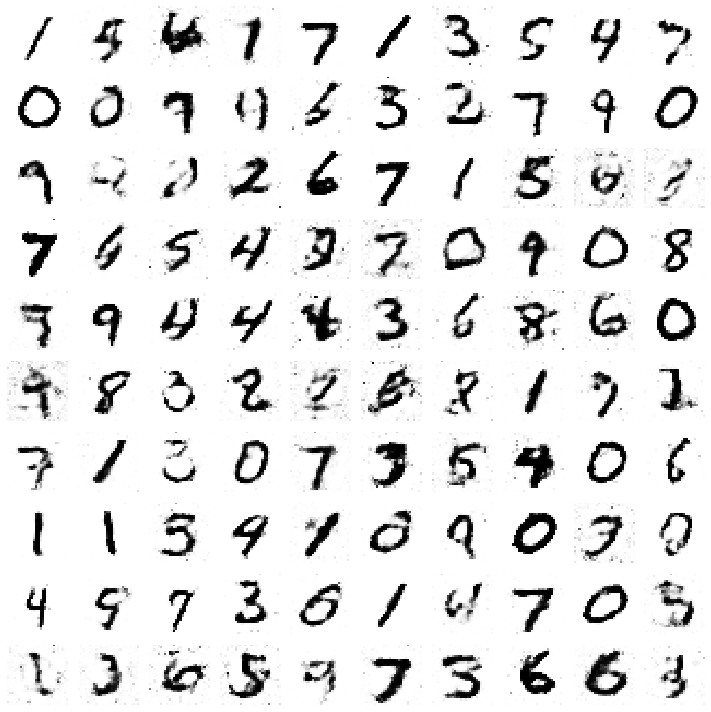

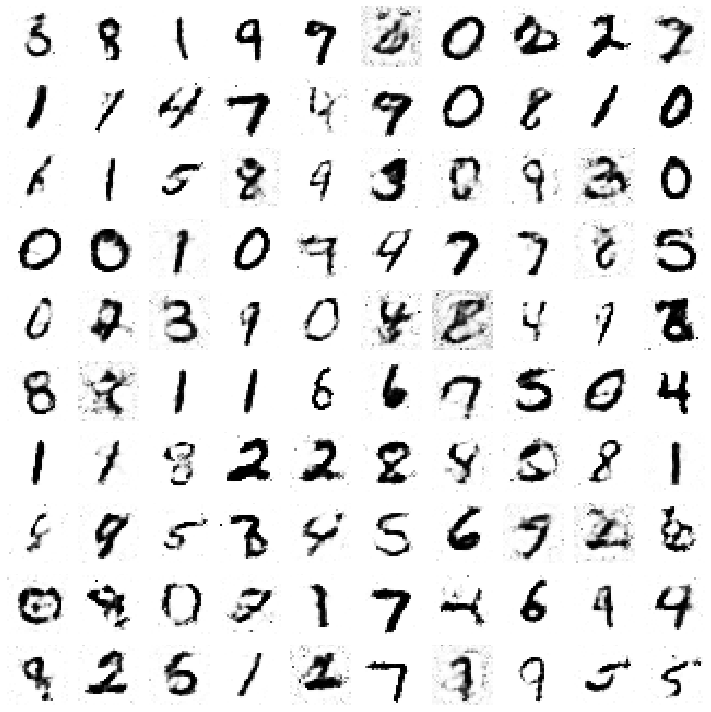

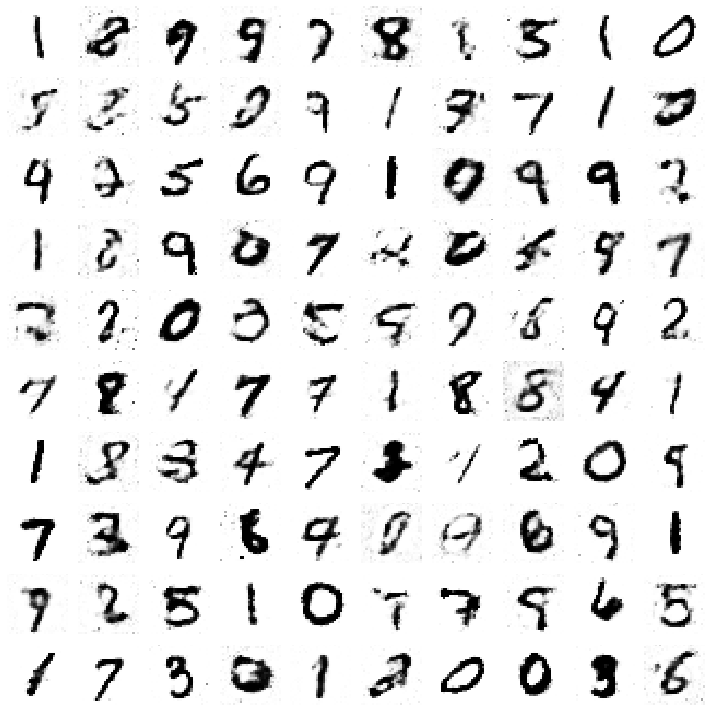

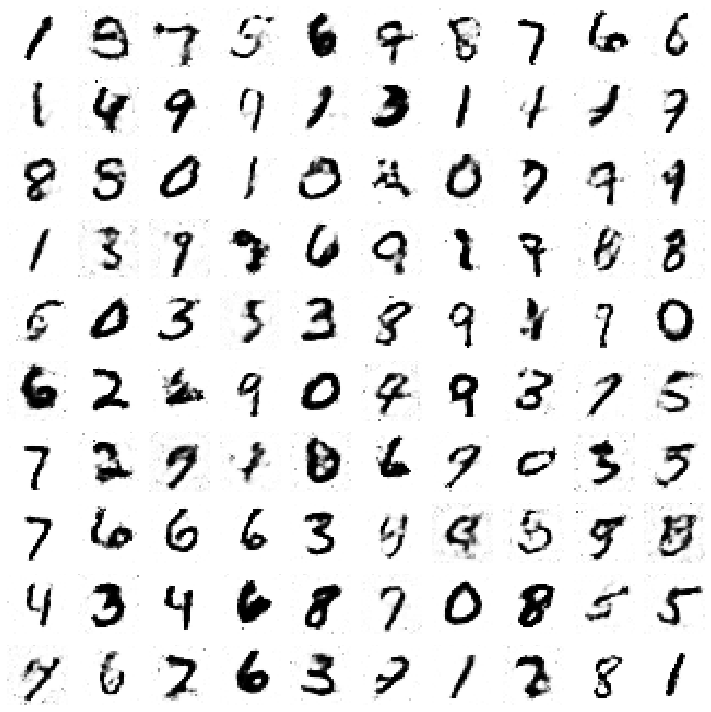

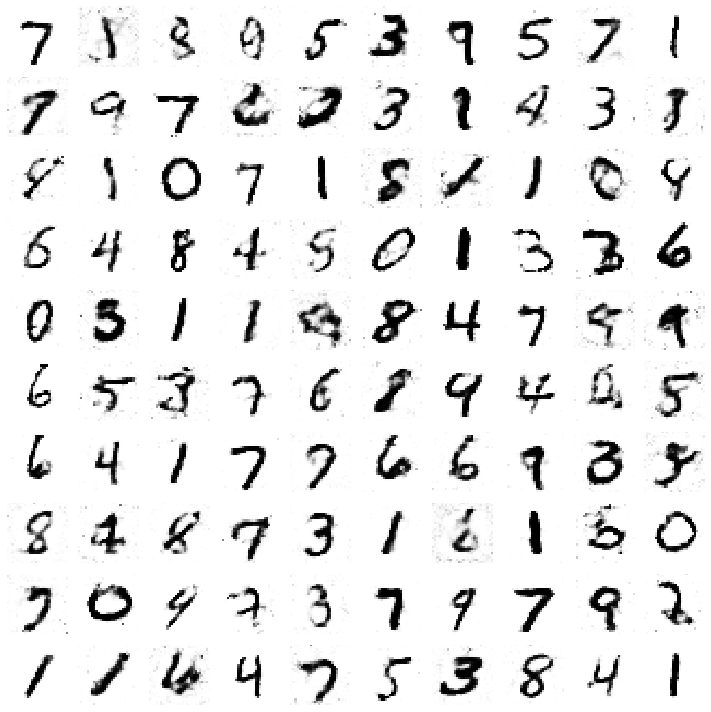

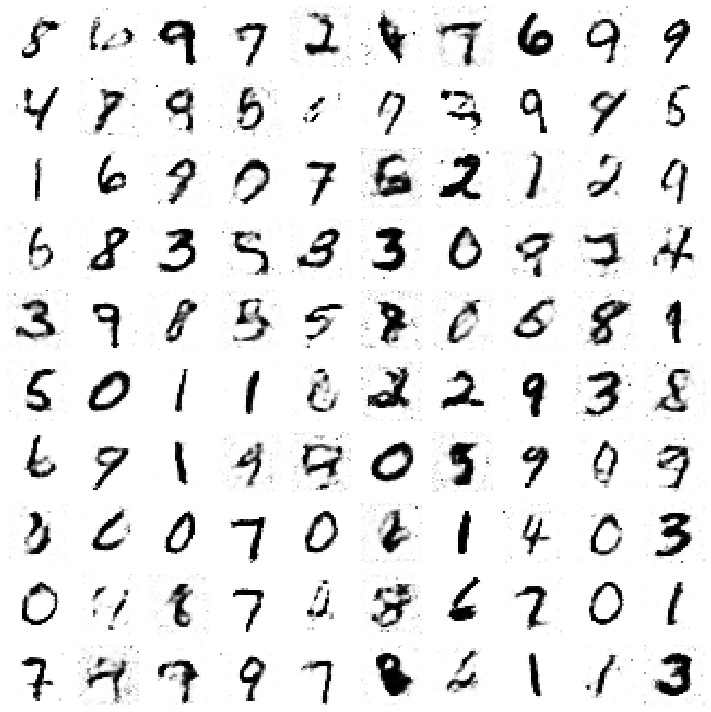

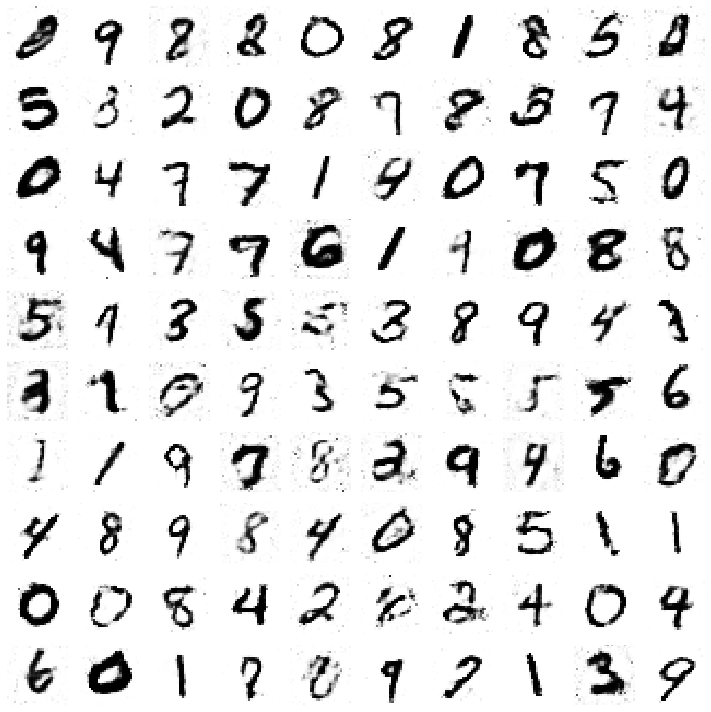

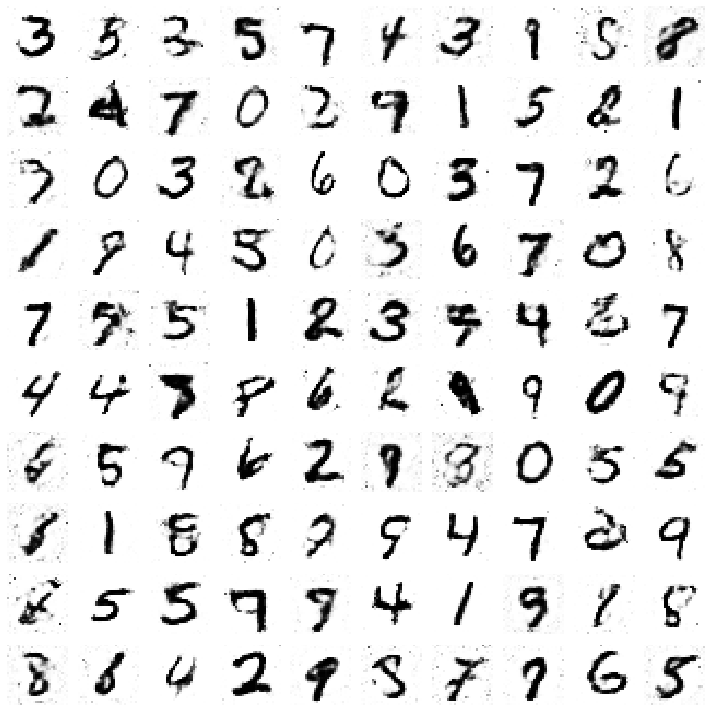

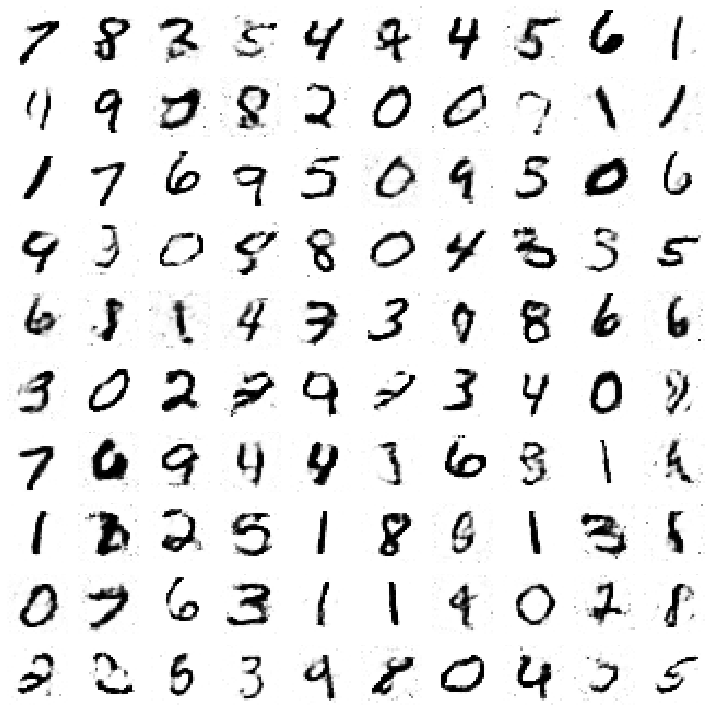

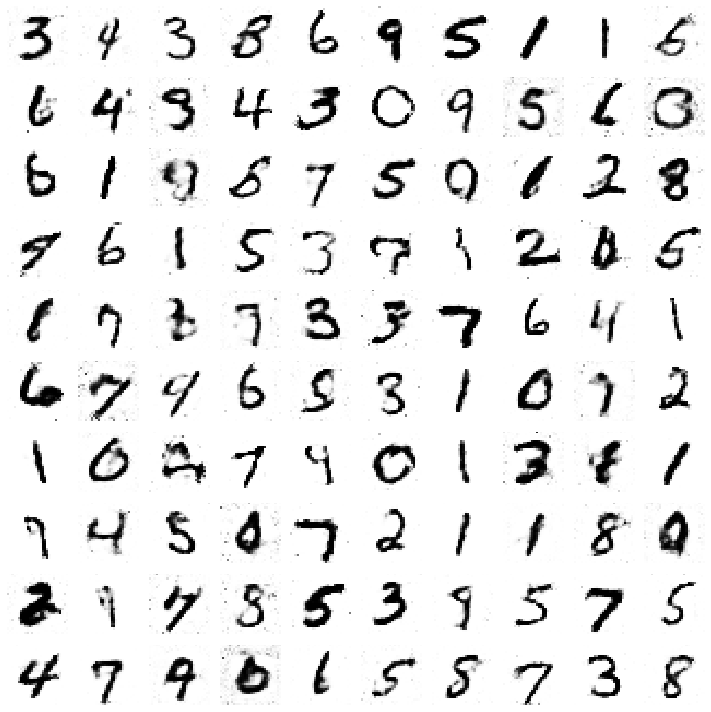

In [ ]:
def training(epochs=1, batch_size=128):
    
    #Loading the data
    (X_train, y_train, X_test, y_test) = load_data()
    batch_count = int(X_train.shape[0] / batch_size)
    
    # Creating GAN
    generator= create_generator()
    discriminator= create_discriminator()
    gan = create_gan(discriminator, generator)
    
    for e in range(1,epochs+1 ):
        print("Epoch %d" %e)
        #array_index = list(np.array(range(0, X_train.shape[0])))
        #np.random.shuffle(array_index)
        for _ in tqdm(range(batch_count)):
        #generate  random noise as an input  to  initialize the  generator
            noise= np.random.normal(0,1, [batch_size, 100])
            
            # Generate fake MNIST images from noised input
            generated_images = generator.predict(noise)
            
            # Get a random set of  real images
            image_batch =X_train[np.random.randint(low=0,high=X_train.shape[0],size=batch_size)]
            
            #Construct different batches of  real and fake data 
            X= np.concatenate([image_batch, generated_images])
            
            # Labels for generated and real data
            y_dis=np.zeros(2*batch_size)
            y_dis[:batch_size]= 0.9
            
            #Pre train discriminator on  fake and real data  before starting the gan. 
            #discriminator.trainable=True
            discriminator.train_on_batch(X, y_dis)
            
            #Tricking the noised input of the Generator as real data
            noise= np.random.normal(0,1, [batch_size, 100])
            y_gen = np.ones(batch_size)
            
            # During the training of gan, 
            # the weights of discriminator should be fixed. 
            #We can enforce that by setting the trainable flag
            #discriminator.trainable=False
            
            #training  the GAN by alternating the training of the Discriminator 
            #and training the chained GAN model with Discriminator’s weights freezed.
            gan.train_on_batch(noise, y_gen)
            
        if e == 1 or e % 20 == 0:
           
            plot_generated_images(e, generator)
training(300,512)